In [1]:
# https://python-graph-gallery.com/web-waffle-chart-for-time-series/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pywaffle import Waffle
from highlight_text import fig_text

from common import (
    read_workout_dfs, 
    load_racing_sans_one_font, 
    load_roboto_condensed_font, 
    MY_COLORS
)

In [2]:
title_font = load_racing_sans_one_font()
body_font = load_roboto_condensed_font()

colors = [MY_COLORS['Medium Midnight Blue'], MY_COLORS['Light Blue'], MY_COLORS['Bright Orange'], MY_COLORS['Slightly Darker Orange'], 'white']

In [3]:
dfs = read_workout_dfs()

In [4]:
workout_types = [
    "Bike",
    "Run",
    "Swim",
    "Strength"
]

dfs_agg = []
for year, df in dfs.items():
    df_agg = df[(~pd.isna(df["TimeTotalInHours"])) & (df["WorkoutType"].isin(workout_types))][["WorkoutDay", "WorkoutType"]].groupby("WorkoutType", as_index=False).count()
    df_agg = df_agg.rename(columns={"WorkoutDay": "Count"})
    df_agg["Year"] = year
    dfs_agg.append(df_agg)

df_agg = pd.concat(dfs_agg)
df_agg["WorkoutTypeOrder"] = df_agg["WorkoutType"].apply(lambda x: workout_types.index(x))

df_agg = df_agg.sort_values(["Year", "WorkoutTypeOrder"])
df_agg = df_agg.drop(columns=["WorkoutTypeOrder"]).reset_index(drop=True)
df_agg

,WorkoutType,Count,Year
0,Bike,28,2021
1,Run,51,2021
2,Swim,42,2021
3,Strength,24,2021
4,Bike,121,2022
5,Run,112,2022
6,Swim,63,2022
7,Strength,22,2022
8,Bike,141,2023
9,Run,108,2023


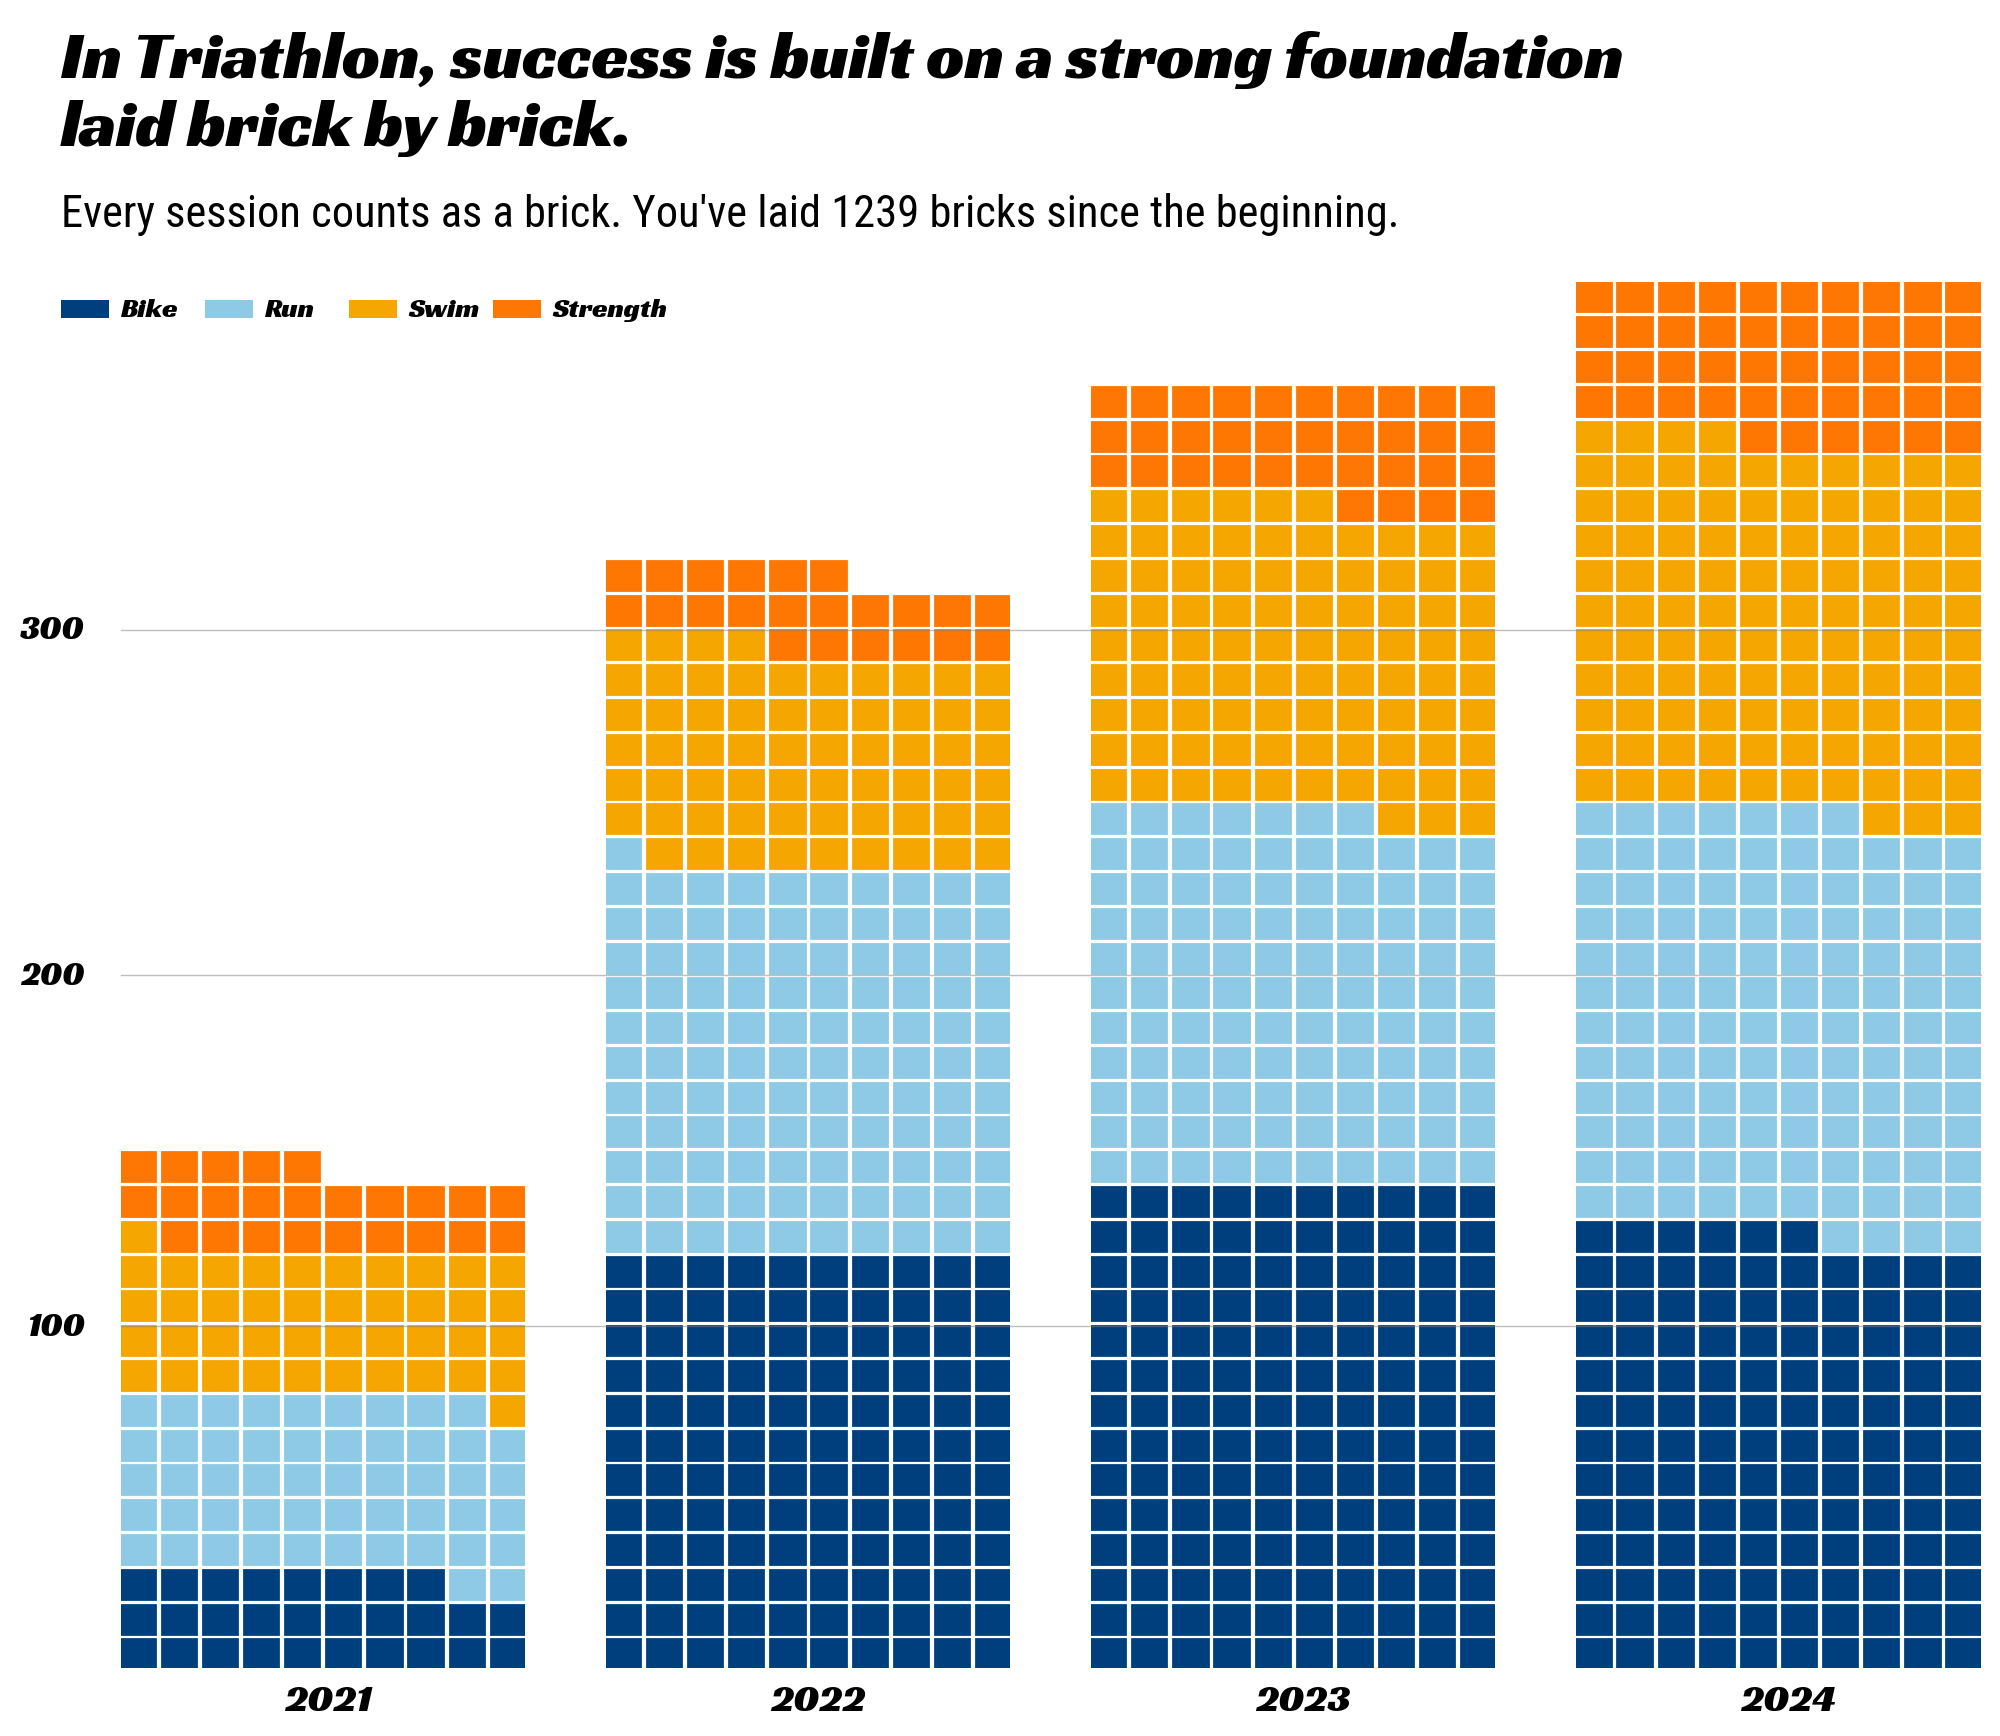

In [33]:
max_year_value = df_agg.groupby("Year")["Count"].sum().max()

waffle_rows = 40
waffle_cols = 10

ncols = df_agg["Year"].nunique()
fig, axs = plt.subplots(nrows=1, ncols=ncols, figsize=(12, 9), dpi=200)

for year, ax in zip(df_agg["Year"].unique(), axs):
    values = list(df_agg[df_agg["Year"] == year]["Count"].values)
    values.append(max_year_value - sum(values))

    Waffle.make_waffle(
        ax=ax,
        rows=waffle_rows,
        columns=waffle_cols,
        values=values,
        vertical=True,
        colors=colors
    )

    ax.text(
        x=0.1, y=-0.03, s=str(year), font=title_font, fontsize=14, zorder=3
    )

total_blocks = waffle_rows * waffle_cols * .82
line_block_positions = [100, 200, 300]
line_positions = [.3, .495, .687]
for y, block_pos in zip(line_positions, line_block_positions):
    line = plt.Line2D([0.125, 0.9], [y, y], transform=fig.transFigure, color='grey', linestyle='-', linewidth=0.5, alpha=0.5)
    fig.add_artist(line)
    fig.text(0.11, y, str(block_pos), va='center', ha='right', transform=fig.transFigure, fontsize=12, font=title_font)

title_text = "In Triathlon, success is built on a strong foundation \nlaid brick by brick."
subtitle_text = f"Every session counts as a brick. You've laid {df_agg['Count'].sum()} bricks since the beginning."

fig_text(
    x=0.1, y=1.02, s=title_text, ha='left', va='top',
    fontsize=24, font=title_font
)
fig_text(
    x=0.1, y=0.93, s=subtitle_text, ha='left', va='top',
    fontsize=16, font=body_font
)
categories = list(df_agg['WorkoutType'].unique())
rect_height = 0.01
rect_width = 0.02
spacing = 0.04  
start_x = 0.1
start_y = 0.86
for i, (category, color) in enumerate(zip(categories, colors[:-1])):
    rect = plt.Rectangle((start_x + i * (rect_width + spacing), start_y), rect_width, rect_height, 
                         facecolor=color, edgecolor='none', transform=fig.transFigure)
    fig.add_artist(rect)
    fig.text(start_x + i * (rect_width + spacing) + rect_width + 0.005, start_y + rect_height / 2, 
             category, va='center', ha='left', transform=fig.transFigure, fontsize=10, font=title_font)

plt.savefig('../figures/waffle.png', dpi=500, bbox_inches='tight')
plt.show()